In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

path = r"C:\Users\10634\Desktop\frailty\data.xlsx"

drop_feature = ['Frail诊断','Fried诊断','衰弱评估','其他疾病', '手表', '缝纫机', '自行车']
# 原始数据
df = pd.read_excel(path)
for i in drop_feature:
    df.drop(i,axis=1,inplace=True)

# 分类变量
df_class = pd.read_excel(path,sheet_name='分类变量')
for i in drop_feature:
    df_class.drop(i,axis=1,inplace=True)
df_class['衰弱'].replace({'2':'0'},inplace=True)


# 数值变量
df_numeric = pd.read_excel(path,sheet_name='数值变量')
c = Counter(df['衰弱'])
numeric_feature = list(df_numeric.columns)


class_feature = list(df_class.columns)

threshold = 0.01
variances = df.var()
low_variance_columns = variances[variances < threshold].index
df = df.drop(columns=low_variance_columns)
class_feature = [i for i in df.columns if i in class_feature]
numeric_feature = [i for i in df.columns if i in numeric_feature]
df = pd.concat([df[class_feature],df[numeric_feature]],axis=1)
df['衰弱'].replace({2:0},inplace=True)

for i in class_feature:
#     df[i] = df[i].astype('int')
    df[i] = df[i].astype('int')
df.dropna(thresh=int(len(df)/3),axis=1,inplace=True)
df.columns

Index(['性别', '民族', '认知', '职业', '衰弱', '婚姻', '家庭结构', '收入', '职工保险', '居民保险',
       '合作医疗', '贫困救助', '商业保险', '全部公费', '全部自费', '其他保险', '青霉素', '磺胺', '链霉素',
       '其他药物', '高血压', '糖尿病', '冠心病', '慢阻肺', '脑卒中', '高脂血症', '消化道溃疡', '骨关节炎',
       '肝炎', '疾病数目', '手术史', '外伤史', '输血史', '残疾', '30岁前锻炼', '目前锻炼', '睡眠', '吸烟史',
       '饮酒史', '不良事件', '初潮', '绝经', '年龄', '收缩压', '舒张压', '身高', '体重', '腰围', 'BMI',
       '握力', '握力2', '左上周径', '右上周径', '左下周径', '周径'],
      dtype='object')

# 汉族

## 删除异常特征

In [2]:
h_df = df[df['民族'] == 1].copy()
h_df = h_df.fillna(value=888)
error_feature = ['职业','婚姻','合作医疗','糖尿病','疾病数目','手术史','外伤史','输血史','30岁前锻炼','目前锻炼','不良事件']
# 删除异常样本
del_index = []
for i in error_feature:
    c = Counter(df[i])
    c = dict(c)
    for key in c.keys():
        if c[key] < 10 and key != 888:
            del_index.append(h_df[h_df[i] == key].index)
del_index = list(set([item for i in del_index for item in i]))
for i in del_index:
    h_df = h_df[h_df.index != i]
h_df.replace(888,np.nan,inplace=True)
for i in class_feature:
#     df[i] = df[i].astype('int')
    h_df[i] = h_df[i].astype('category')
h_df = h_df.drop(labels='民族',axis=1)
h_df.dropna(thresh=int(len(h_df)/2),axis=1)
h_df


,性别,认知,职业,衰弱,婚姻,家庭结构,收入,职工保险,居民保险,合作医疗,...,身高,体重,腰围,BMI,握力,握力2,左上周径,右上周径,左下周径,周径
0,2,1,4.0,0,2.0,2.0,4,2.0,1.0,2.0,...,154.0,60.0,89.0,25.3,12.8,NaN,NaN,NaN,NaN,NaN
1,1,1,7.0,0,2.0,1.0,2,NaN,NaN,1.0,...,174.0,90.0,102.0,29.7,36.1,38.2,32.0,32.0,49.0,49.0
2,2,1,4.0,0,2.0,1.0,3,NaN,NaN,1.0,...,147.0,55.0,88.0,25.0,23.5,20.1,28.0,28.0,50.0,50.0
4,2,1,7.0,0,2.0,4.0,4,NaN,1.0,NaN,...,150.0,56.0,83.0,24.9,13.3,13.5,28.0,28.0,43.0,43.0
5,2,1,4.0,0,3.0,4.0,3,1.0,NaN,NaN,...,160.0,77.0,104.0,30.1,26.3,22.3,33.0,33.0,48.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,1,1,7.0,0,2.0,1.0,2,2.0,2.0,1.0,...,174.0,90.0,102.0,29.7,36.1,38.2,32.0,34.0,94.0,9.0
1180,1,1,3.0,0,2.0,2.0,3,2.0,2.0,1.0,...,170.0,72.0,88.0,24.9,44.8,45.2,29.0,32.0,50.0,50.0
1181,2,1,7.0,1,2.0,1.0,2,2.0,1.0,2.0,...,150.0,43.0,94.0,19.1,13.6,10.3,27.0,27.0,35.0,35.0
1182,2,1,7.0,0,3.0,4.0,3,2.0,1.0,2.0,...,140.0,47.0,93.0,24.0,7.3,NaN,25.0,25.0,49.0,49.0


## 填补缺失值

In [3]:
import miceforest as mf

kernel = mf.ImputationKernel(h_df,datasets=4,save_all_iterations=True,random_state=1)
kernel.mice(2)
complete_df = kernel.complete_data()
h_df = complete_df.copy()

# 读取填补后的数据

In [172]:
import pandas as pd

path1 = "C:\\Users\\10634\Desktop\\frailty\\汉族填补后数据.csv"
path2 = path = "C:\\Users\\10634\Desktop\\frailty\\蒙族填补后数据.csv"
h_df = pd.read_csv(path1,encoding='utf-8-sig')
m_df = pd.read_csv(path2,encoding='utf-8-sig')
hy,hx = h_df['衰弱'],h_df[[col for col in h_df.columns if col != '衰弱']]
my,mx = m_df['衰弱'],m_df[[col for col in m_df.columns if col != '衰弱']]

# 数据预处理

## 随机抽样

In [173]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
path1 = "C:\\Users\\10634\Desktop\\frailty\\汉族填补后数据.csv"
path2 = path = "C:\\Users\\10634\Desktop\\frailty\\蒙族填补后数据.csv"
h_df = pd.read_csv(path1,encoding='utf-8-sig').iloc[:,1:]
m_df = pd.read_csv(path2,encoding='utf-8-sig').iloc[:,1:]

mongolian_sample_size = len(m_df)
h_df = h_df.sample(n=mongolian_sample_size, random_state=42)
hy,hx = h_df['衰弱'],h_df[[col for col in h_df.columns if col != '衰弱']]
my,mx = m_df['衰弱'],m_df[[col for col in m_df.columns if col != '衰弱']]

hx_numeric = hx[[i for i in numeric_feature if i in hx.columns]]
hx_class = hx[[i for i in hx.columns if i not in hx_numeric.columns]]


mx_numeric = mx[[i for i in numeric_feature if i in mx.columns]]
mx_class = mx[[i for i in mx.columns if i not in mx_numeric.columns]]

## 标准化

In [174]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
hx_numeric = s.fit_transform(hx_numeric)
mx_numeric = s.fit_transform(mx_numeric)
hx_scaler = pd.concat([pd.DataFrame(np.array(hx_class)),pd.DataFrame(hx_numeric)],axis=1)
hx_scaler.columns = hx.columns
for i in hx_class.columns:
    hx_scaler[i] = hx_scaler[i].astype('int')
mx_scaler = pd.concat([pd.DataFrame(np.array(mx_class)),pd.DataFrame(mx_numeric)],axis=1)
mx_scaler.columns = mx.columns
for i in mx_class.columns:
    mx_scaler[i] = mx_scaler[i].astype('int')

In [175]:
hxtrain,hxtest,hytrain,hytest = train_test_split(hx_scaler,hy,test_size=0.2)
mxtrain,mxtest,mytrain,mytest = train_test_split(mx_scaler,my,test_size=0.2)

# 重采样前

## RFE

### accuracy

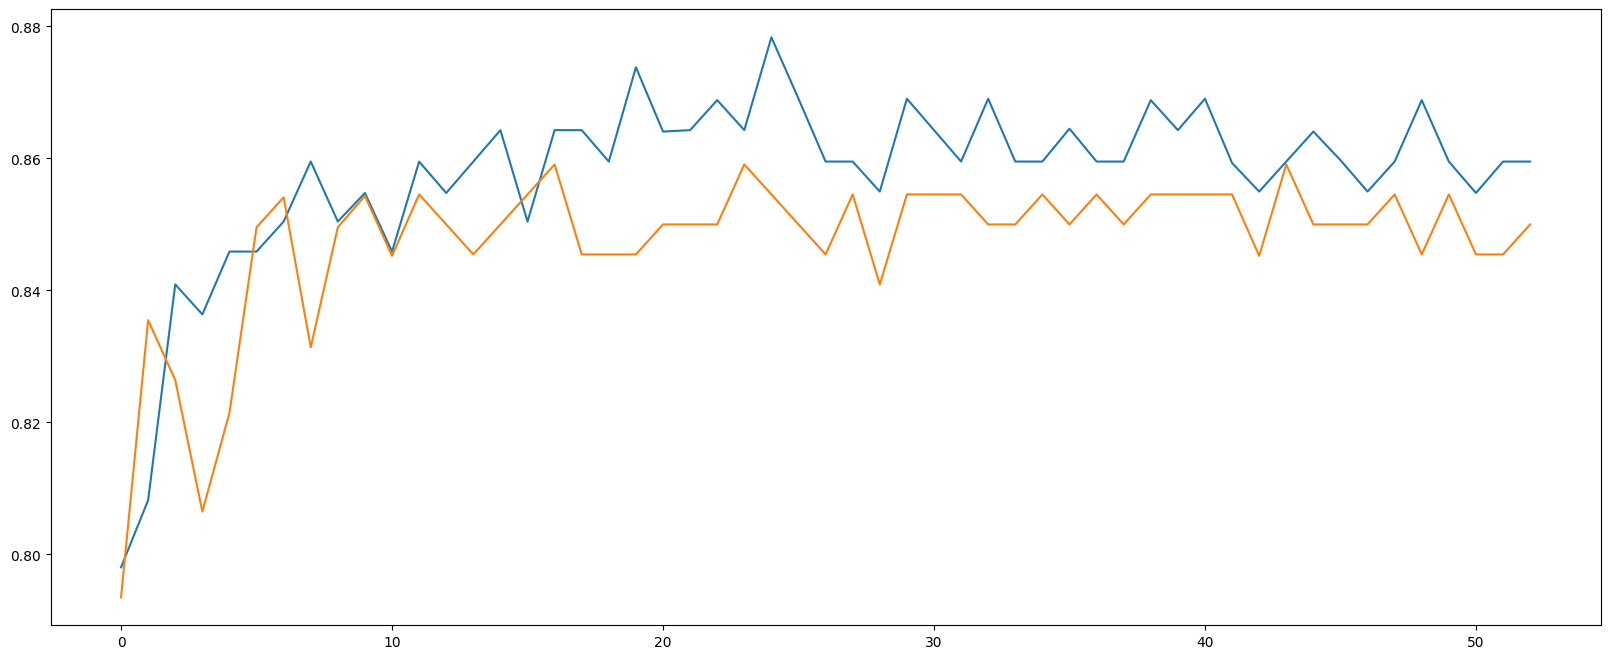

In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

hx_scores, mx_scores = [],[]

rfc = RFC(n_estimators=100,random_state=42)
for n in range(1,len(hx.columns)+1,1):
    # 汉族
    selector_h = RFE(rfc, n_features_to_select=n, step=1).fit(hx_scaler, hy)  
    hx_wrapper = selector_h.transform(hx_scaler)
    h_score =cross_val_score(rfc, hx_wrapper, hy, cv=10).mean()
    hx_scores.append(h_score)
    # 蒙族
    selector_m = RFE(rfc, n_features_to_select=n, step=1).fit(mx_scaler, my)  
    mx_wrapper = selector_m.transform(mx_scaler)
    m_score =cross_val_score(rfc, mx_wrapper, my, cv=10).mean()
    mx_scores.append(m_score)

plt.figure(figsize=[20, 8])
plt.plot(range(len(hx.columns)),hx_scores)
plt.plot(range(len(mx.columns)),mx_scores)
plt.show()


### recall

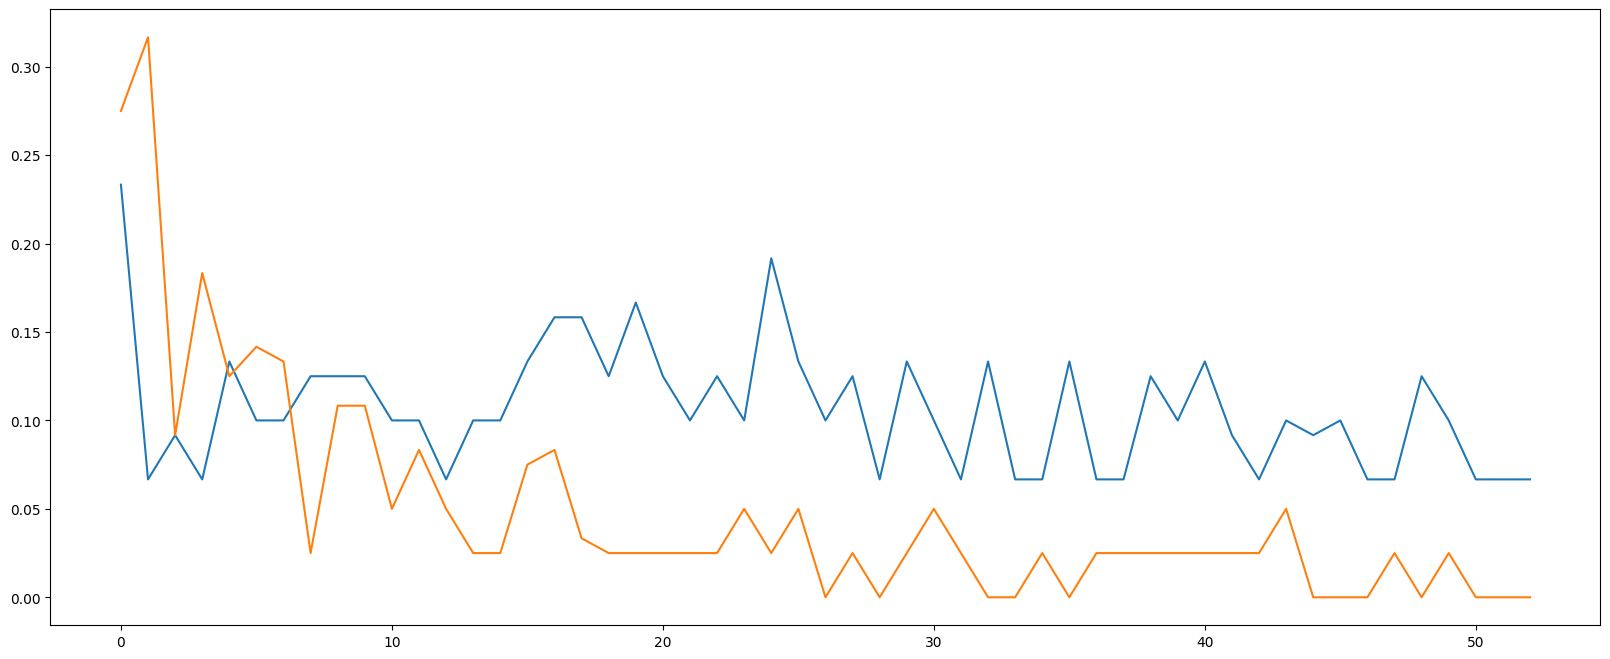

In [58]:
hx_recall, mx_recall = [],[]

rfc = RFC(n_estimators=100,random_state=42)
for n in range(1,len(hx.columns)+1,1):
    # 汉族
    selector_h = RFE(rfc, n_features_to_select=n, step=1).fit(hx_scaler, hy)  
    hx_wrapper = selector_h.transform(hx_scaler)
    h_score =cross_val_score(rfc, hx_wrapper, hy, cv=10,scoring='recall').mean()
    hx_recall.append(h_score)
    # 蒙族
    selector_m = RFE(rfc, n_features_to_select=n, step=1).fit(mx_scaler, my)  
    mx_wrapper = selector_m.transform(mx_scaler)
    m_score =cross_val_score(rfc, mx_wrapper, my, cv=10,scoring='recall').mean()
    mx_recall.append(m_score)


plt.figure(figsize=[20, 8])
plt.plot(range(len(hx.columns)),hx_recall)
plt.plot(range(len(mx.columns)),mx_recall)
plt.show()

### f1

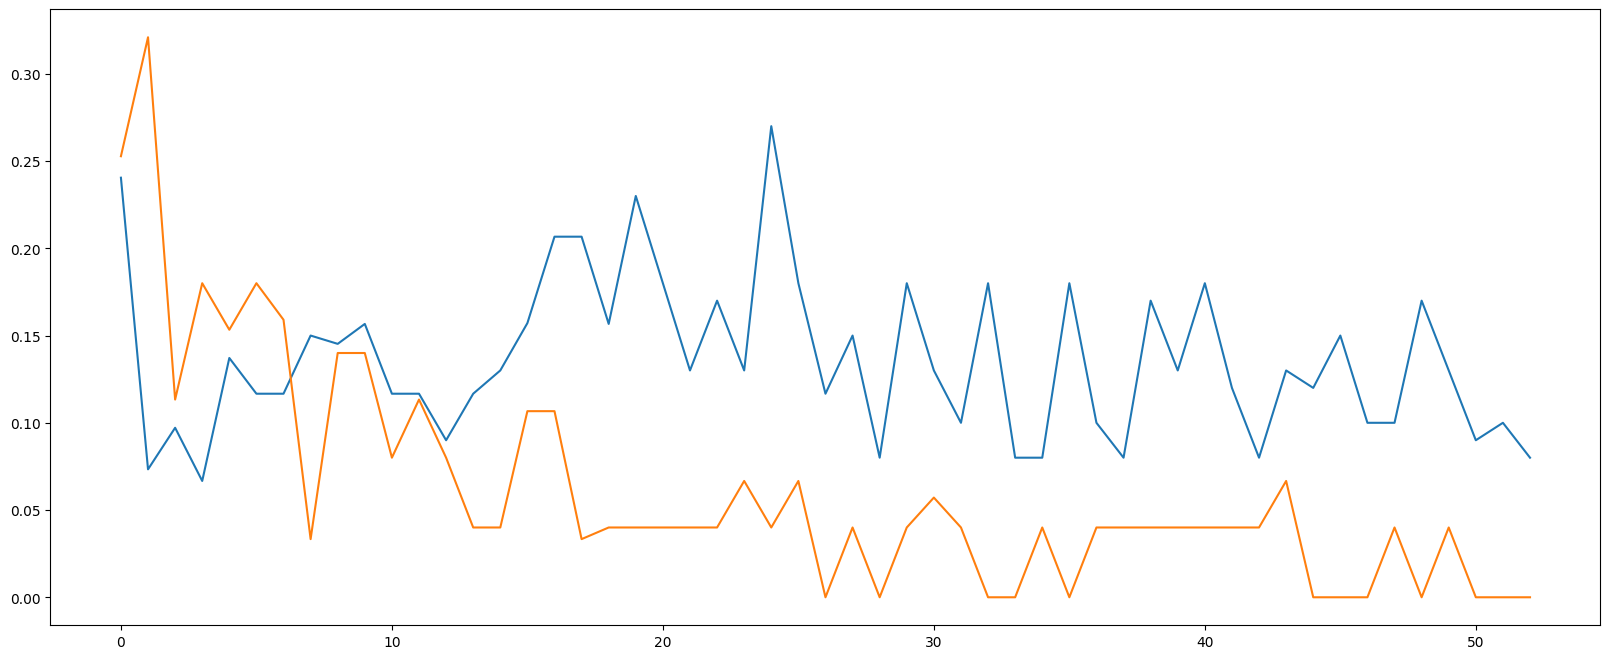

In [59]:
hx_f1, mx_f1 = [],[]

rfc = RFC(n_estimators=100,random_state=42)
for n in range(1,len(hx.columns)+1,1):
    # 汉族
    selector_h = RFE(rfc, n_features_to_select=n, step=1).fit(hx_scaler, hy)  
    hx_wrapper = selector_h.transform(hx_scaler)
    h_score =cross_val_score(rfc, hx_wrapper, hy, cv=10,scoring='f1').mean()
    hx_f1.append(h_score)
    # 蒙族
    selector_m = RFE(rfc, n_features_to_select=n, step=1).fit(mx_scaler, my)  
    mx_wrapper = selector_m.transform(mx_scaler)
    m_score =cross_val_score(rfc, mx_wrapper, my, cv=10,scoring='f1').mean()
    mx_f1.append(m_score)


plt.figure(figsize=[20, 8])
plt.plot(range(len(hx.columns)),hx_f1)
plt.plot(range(len(mx.columns)),mx_f1)
plt.show()

### auc

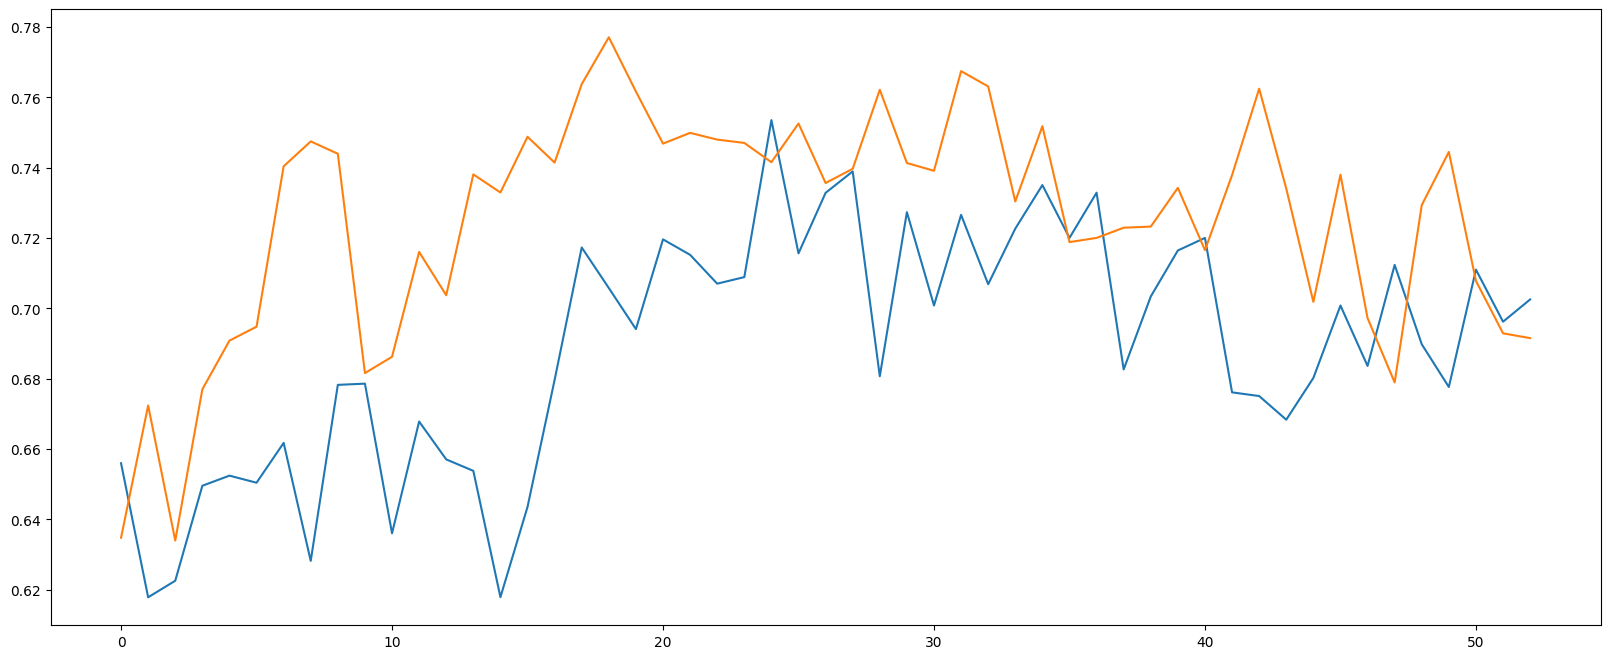

In [60]:
hx_auc, mx_auc = [],[]

rfc = RFC(n_estimators=100,random_state=42)
for n in range(1,len(hx.columns)+1,1):
    # 汉族
    selector_h = RFE(rfc, n_features_to_select=n, step=1).fit(hx_scaler, hy)  
    hx_wrapper = selector_h.transform(hx_scaler)
    h_score =cross_val_score(rfc, hx_wrapper, hy, cv=10,scoring='roc_auc').mean()
    hx_auc.append(h_score)
    # 蒙族
    selector_m = RFE(rfc, n_features_to_select=n, step=1).fit(mx_scaler, my)  
    mx_wrapper = selector_m.transform(mx_scaler)
    m_score =cross_val_score(rfc, mx_wrapper, my, cv=10,scoring='roc_auc').mean()
    mx_auc.append(m_score)


plt.figure(figsize=[20, 8])
plt.plot(range(1,len(hx.columns)+1),hx_auc,label='Han')
plt.plot(range(1,len(mx.columns)+1),mx_auc,label='Monglia')
plt.show()

In [196]:
hx_auc, mx_auc = [],[]

rfc = RFC(n_estimators=100,random_state=42)
for n in range(1,len(hx.columns)+1,1):
    # 汉族
    selector_h = RFE(rfc, n_features_to_select=n, step=1).fit(hx_smotesampled, hy_smotesampled)  
    hx_wrapper = selector_h.transform(hx_scaler)
    h_score =cross_val_score(rfc, hx_wrapper, hy_smotesampled, cv=10,scoring='roc_auc').mean()
    hx_auc.append(h_score)
    # 蒙族
    selector_m = RFE(rfc, n_features_to_select=n, step=1).fit(mx_smotesampled, my_smotesampled)  
    mx_wrapper = selector_m.transform(mx_smotesampled)
    m_score =cross_val_score(rfc, mx_wrapper, my_smotesampled, cv=10,scoring='roc_auc').mean()
    mx_auc.append(m_score)


plt.figure(figsize=[15, 8])
plt.plot(range(1,len(hx.columns)+1),hx_auc,label='Han')
plt.plot(range(1,len(mx.columns)+1),mx_auc,label='Monglia')
plt.legend()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [213, 294]

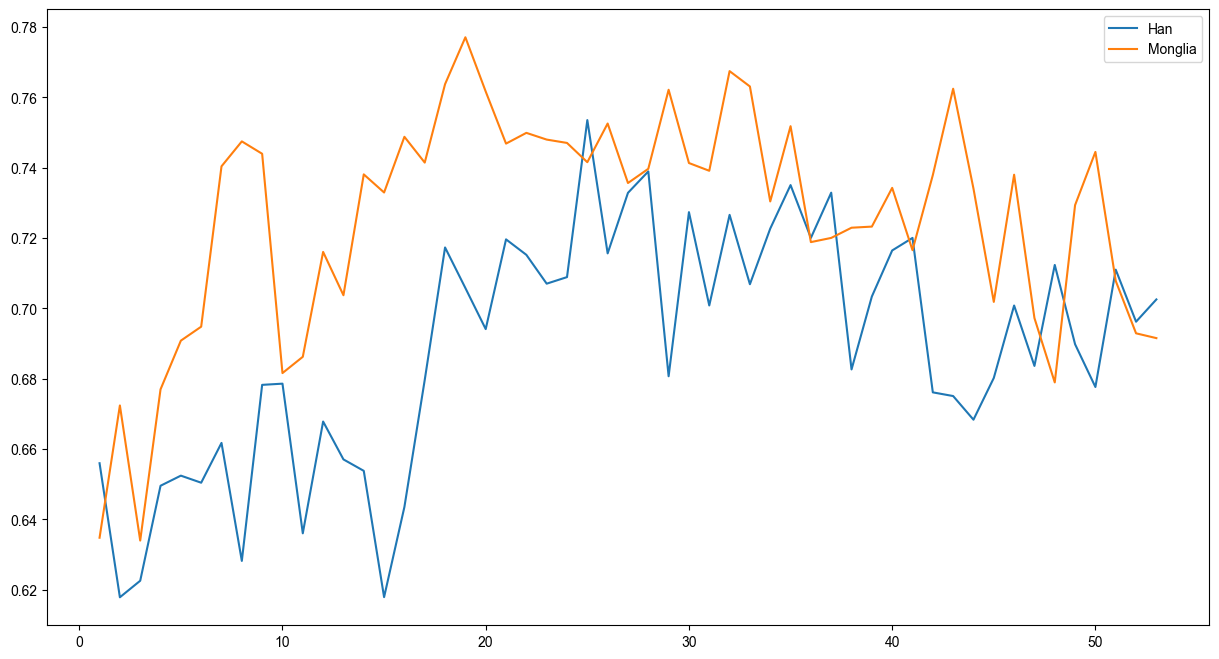

In [194]:
plt.figure(figsize=[15, 8])
plt.plot(range(1,len(hx.columns)+1),hx_auc,label='Han')
plt.plot(range(1,len(mx.columns)+1),mx_auc,label='Monglia')
plt.legend()
plt.show()

## RFECV

### recall

In [206]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
h_recall_rfecv, m_recall_rfecv = [],[]
rfc = RFC(n_estimators=100,random_state=42)
for i in range(1,len(hx_scaler.columns)+1,1):
    h_rfecv = RFECV(estimator=rfc,          # 学习器
                min_features_to_select=i, # 最小选择的特征数量
                step=1,                 # 移除特征个数
                cv=StratifiedKFold(10),  # 交叉验证次数
                scoring='recall',     # 学习器的评价标准
                verbose = 0,
                n_jobs = 1
                ).fit(hxtrain, hytrain)
    h_recall_rfecv.append(h_rfecv.score(hxtest,hytest))
    m_rfecv = RFECV(estimator=rfc,          # 学习器
                min_features_to_select=i, # 最小选择的特征数量
                step=1,                 # 移除特征个数
                cv=StratifiedKFold(10),  # 交叉验证次数
                scoring='recall',     # 学习器的评价标准
                verbose = 0,
                n_jobs = 1
                ).fit(mxtrain, mytrain)
    m_recall_rfecv.append(m_rfecv.score(mxtest,mytest))
plt.figure(figsize=[15, 8])
plt.plot(range(1,len(hx.columns)+1),h_recall_rfecv,label='Han')
plt.plot(range(1,len(mx.columns)+1),m_recall_rfecv,label='Monglia')
plt.legend()
plt.show()

# 重采样

In [177]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
# SMOTE法过采样
# ros = RandomOverSampler(random_state=42)
# hx_ros, hy_ros = ros.fit_resample(hxtrain,hytrain)
# mx_ros, my_ros = ros.fit_resample(mxtrain,mytrain)
smote = SMOTE(random_state=100) 
hx_smotesampled, hy_smotesampled = smote.fit_resample(hxtrain, hytrain)
mx_smotesampled, my_smotesampled = smote.fit_resample(mxtrain, mytrain)  

In [179]:
import numpy as np
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import AdaBoostClassifier as ADA
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from xgboost import XGBClassifier as XGBC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

xgbc = XGBC().fit(hx_smotesampled,hy_smotesampled)
svc = SVC(probability=True, class_weight='balanced').fit(hx_smotesampled,hy_smotesampled)
lr = LR().fit(hx_smotesampled,hy_smotesampled)
knn = KNN().fit(hx_smotesampled,hy_smotesampled)
rf = RF().fit(hx_smotesampled,hy_smotesampled)
lda = LDA().fit(hx_smotesampled,hy_smotesampled)
gbdt = GBDT().fit(hx_smotesampled,hy_smotesampled)
ada = ADA().fit(hx_smotesampled,hy_smotesampled)
nb = GNB().fit(hx_smotesampled,hy_smotesampled)
models = [xgbc,svc,lr,knn,lda,gbdt,ada,nb]

for model in models:
    try:
        hy_pred = model.predict(hxtest)
        precision = precision_score(hytest, hy_pred, pos_label=1)
        recall = recall_score(hytest, hy_pred, pos_label=1)
        accuracy = accuracy_score(hytest, hy_pred)
        f1 = f1_score(hytest, hy_pred, pos_label=1)
        hy_pred_proba = model.predict_proba(hxtest)[:,1]
        fpr, tpr, thresholds = roc_curve(hytest, hy_pred_proba)
        auc_score = auc(fpr, tpr)
        metrics = {
            "Model": model,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "AUC": auc_score
        }
        print(metrics)
    except:
        print(f'{i}出错')

d:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), 'Accuracy': 0.7906976744186046, 'Precision': 0.5, 'Recall': 0.2222222222222222, 'F1 Score': 0.30769230769230765, 'AUC': 0.7777777777777778}
{'Model': SVC(class_weight='balanced', probability=True), 'Accuracy': 0.6744186046511628, '

In [96]:
import numpy as np
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import AdaBoostClassifier as ADA
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from xgboost import XGBClassifier as XGBC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

xgbc = XGBC().fit(mx_smotesampled,my_smotesampled)
svc = SVC(probability=True, class_weight='balanced').fit(mx_smotesampled,my_smotesampled)
lr = LR().fit(mx_smotesampled,my_smotesampled)
knn = KNN().fit(mx_smotesampled,my_smotesampled)
rf = RF().fit(mx_smotesampled,my_smotesampled)
lda = LDA().fit(mx_smotesampled,my_smotesampled)
gbdt = GBDT().fit(mx_smotesampled,my_smotesampled)
ada = ADA().fit(mx_smotesampled,my_smotesampled)
nb = GNB().fit(mx_smotesampled,my_smotesampled)
models = [xgbc,svc,lr,knn,lda,gbdt,ada,nb]

for model in models:
    try:
        my_pred = model.predict(mxtest)
        precision = precision_score(mytest, my_pred, pos_label=1)
        recall = recall_score(mytest, my_pred, pos_label=1)
        accuracy = accuracy_score(mytest, my_pred)
        f1 = f1_score(mytest, my_pred, pos_label=1)
        my_pred_proba = model.predict_proba(mxtest)[:,1]
        fpr, tpr, thresholds = roc_curve(mytest, my_pred_proba)
        auc_score = auc(fpr, tpr)
        metrics = {
            "Model": model,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "AUC": auc_score
        }
        print(metrics)
    except:
        print(f'{i}出错')

d:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), 'Accuracy': 0.7674418604651163, 'Precision': 0.2, 'Recall': 0.14285714285714285, 'F1 Score': 0.16666666666666666, 'AUC': 0.5317460317460317}
{'Model': SVC(class_weight='balanced', probability=True), 'Accuracy': 0.7674418604651163, 

In [71]:
def ml_xgb(Xtrain,Ytrain,Xtest, Ytest, min_child_weight,max_depth,reg_alpha,reg_lambda):
    from xgboost import XGBClassifier as XGBC
    XGB = XGBC(min_child_weight=min_child_weight,max_depth=max_depth,reg_alpha=reg_alpha,reg_lambda=reg_lambda)
    XGB.fit(Xtrain,Ytrain)
    Ytrain_pred = XGB.predict(Xtrain)
    Ytest_pred = XGB.predict(Xtest)
    pred_score_2 = XGB.predict_proba(Xtest)[:, 1]
    pred_score_more = XGB.predict_proba(Xtest)

    return Ytrain_pred,Ytest_pred,pred_score_more,pred_score_2


def ml_svm(Xtrain,Ytrain,Xtest,Ytest,kernel):
    from sklearn.svm import SVC
    SVM = SVC(probability=True, class_weight='balanced',kernel=kernel).fit(Xtrain,Ytrain)
    Ytrain_pred = SVM.predict(Xtrain)
    Ytest_pred = SVM.predict(Xtest)
    pred_score_2 = SVM.predict_proba(Xtest)[:, 1]
    pred_score_more = SVM.predict_proba(Xtest)

    return Ytrain_pred,Ytest_pred,pred_score_more,pred_score_2


def ml_lr(Xtrain,Ytrain,Xtest,Ytest):
    from sklearn.linear_model import LogisticRegression as LR
    lr = LR().fit(Xtrain,Ytrain)
    Ytrain_pred = lr.predict(Xtrain)
    Ytest_pred = lr.predict(Xtest)
    pred_score_2 = lr.predict_proba(Xtest)[:, 1]
    pred_score_more = lr.predict_proba(Xtest)

    return Ytrain_pred,Ytest_pred,pred_score_more,pred_score_2




def ml_knn(Xtrain,Ytrain,Xtest,Ytest):
    from sklearn.neighbors import KNeighborsClassifier as KNN
    knn = KNN().fit(Xtrain,Ytrain)
    Ytrain_pred = knn.predict(Xtrain)
    Ytest_pred = knn.predict(Xtest)
    pred_score_2 = knn.predict_proba(Xtest)[:, 1]
    pred_score_more = knn.predict_proba(Xtest)

    return Ytrain_pred,Ytest_pred,pred_score_more,pred_score_2


def ml_dt(Xtrain,Ytrain,Xtest,Ytest):
    from sklearn.tree import DecisionTreeClassifier as DT
    dt = DT().fit(Xtrain,Ytrain)
    Ytrain_pred = dt.predict(Xtrain)
    Ytest_pred = dt.predict(Xtest)
    pred_score_2 = dt.predict_proba(Xtest)[:, 1]
    pred_score_more = dt.predict_proba(Xtest)

    return Ytrain_pred,Ytest_pred,pred_score_more,pred_score_2


def ml_rf(Xtrain,Ytrain,Xtest,Ytest):
    from sklearn.ensemble import RandomForestClassifier as RF
    rf = RF().fit(Xtrain,Ytrain)
    Ytrain_pred = rf.predict(Xtrain)
    Ytest_pred = rf.predict(Xtest)
    pred_score_2 = rf.predict_proba(Xtest)[:, 1]
    pred_score_more = rf.predict_proba(Xtest)

    return Ytrain_pred,Ytest_pred,pred_score_more,pred_score_2


def ml_lda(Xtrain,Ytrain,Xtest,Ytest):
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    lda = LDA().fit(Xtrain,Ytrain)
    Ytrain_pred = lda.predict(Xtrain)
    Ytest_pred = lda.predict(Xtest)
    pred_score_2 = lda.predict_proba(Xtest)[:, 1]
    pred_score_more = lda.predict_proba(Xtest)

    return Ytrain_pred,Ytest_pred,pred_score_more,pred_score_2


def ml_gbdt(Xtrain,Ytrain,Xtest,Ytest):
    from sklearn.ensemble import GradientBoostingClassifier as GBDT
    gbdt = GBDT().fit(Xtrain,Ytrain)
    Ytrain_pred = gbdt.predict(Xtrain)
    Ytest_pred = gbdt.predict(Xtest)
    pred_score_2 = gbdt.predict_proba(Xtest)[:, 1]
    pred_score_more = gbdt.predict_proba(Xtest)

    return Ytrain_pred,Ytest_pred,pred_score_more,pred_score_2


def ml_ada(Xtrain,Ytrain,Xtest,Ytest):
    from sklearn.ensemble import AdaBoostClassifier as ADA
    ada = ADA().fit(Xtrain,Ytrain)
    Ytrain_pred = ada.predict(Xtrain)
    Ytest_pred = ada.predict(Xtest)
    pred_score_2 = ada.predict_proba(Xtest)[:, 1]
    pred_score_more = ada.predict_proba(Xtest)

    return Ytrain_pred,Ytest_pred,pred_score_more,pred_score_2


def ml_gnb(Xtrain,Ytrain,Xtest,Ytest):
    from sklearn.naive_bayes import GaussianNB as GNB
    gnb = GNB().fit(Xtrain,Ytrain)
    Ytrain_pred = gnb.predict(Xtrain)
    Ytest_pred = gnb.predict(Xtest)
    pred_score_2 = gnb.predict_proba(Xtest)[:, 1]
    pred_score_more = gnb.predict_proba(Xtest)

    return Ytrain_pred,Ytest_pred,pred_score_more,pred_score_2

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as auc
from pylab import mpl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix as CM
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss


def plot_roc(Ytest,pred_score_2,pred_score_more):                  
    mpl.rcParams['font.sans-serif'] = ["Arial"]                
    mpl.rcParams["axes.unicode_minus"] = False 
    if len(Ytest.unique()) >2:
        FPR1,recall1,thresholds1=roc_curve(Ytest,pred_score_2,pos_label=1)
        area1=auc(Ytest,pred_score_more,multi_class='ovo')
    else:
        FPR1,recall1,thresholds1=roc_curve(Ytest,pred_score_2,pos_label=1)
        area1=auc(Ytest,pred_score_2)       

    plt.figure(figsize=(7,7),dpi=300,facecolor='white')
    ax=plt.gca()
    ax.set_facecolor('none')
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1.0)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(1.0)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(1.0)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1.0)


    plt.plot(FPR1, recall1, color='blue',
            label='AUC = %0.2f' % area1 ,linewidth=2.0)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--' ,linewidth=1.0)

    font={'family':'Arial', 
      'weight':'normal',
      'size':20
     }
    font2={'family':'Arial', 
        'weight':'normal',
        'size':15
        }
    plt.gca().set(xlim=(-0.05,1.05),ylim=(-0.05,1.05))
    plt.xticks(fontsize=12)                      
    plt.yticks(fontsize=12)
    plt.xlabel('False Positive Rate',fontdict=font)
    plt.ylabel('Recall',fontdict=font)
    plt.title('ROC curve',fontdict={'family':'Arial',  'weight':'normal', 'size':25})
    plt.legend(loc="lower right",prop = font2,facecolor='w',edgecolor='w');
    plt.savefig("ROC_curve.jpg")




def plot_pr(Ytest,pred_score_2,pred_score_more):
    mpl.rcParams['font.sans-serif'] = ["SimSun"]                
    mpl.rcParams["axes.unicode_minus"] = False
    if len(Ytest.unique()) >2:
        precision1,recall1,_ = precision_recall_curve(Ytest,pred_score_more)
    else:
        precision1,recall1,_ = precision_recall_curve(Ytest,pred_score_2)


    plt.figure(figsize=(7,7),dpi=300,facecolor='w')
    ax=plt.gca()
    ax.set_facecolor('none')
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1.0)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(1.0)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(1.0)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1.0)

    plt.plot(recall1,precision1,color='blue',linewidth=2.0)

    font={'family':'Arial', 
      'weight':'normal',
      'size':20
     }
    plt.xlabel("Recall",fontdict=font)
    plt.ylabel("Precision",fontdict=font)
    plt.xticks(fontname='Arial',fontsize=12)                      
    plt.yticks(fontname='Arial',fontsize=12)
    plt.title(' P-R curve' , fontdict={'family':'Arial',  'weight':'normal', 'size':25})
    plt.legend(loc="lower right",prop = font,facecolor='w',edgecolor='w')
    plt.grid(False)
    plt.savefig("PR_curve.jpg")



def plot_confusion_matrix(Ytest, Ytest_pred):
    model = CM(Ytest, Ytest_pred)
    plt.figure(figsize=(6,6),dpi=300)
    sns.set(font="SimHei",font_scale=1.0)

    font={'family':'Arial', 
    'weight':'normal',
      'size':25
    }

    ax=plt.gca()
    sns.heatmap(model, ax=ax, annot=True, cmap=plt.cm.GnBu, annot_kws={'size': 50}, cbar=False)
    ax.set_title("RF Confusion matrix",fontdict=font)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.xlabel("Prediction label", fontdict=font)
    plt.ylabel("True label", fontdict=font)

    plt.savefig("Confusion_Matrix.jpg")



def plot_learning_curve(model, Xtrain, Ytrain, Xval, Yval):
    train_accs=[]
    val_accs=[]
    train_losses=[]
    val_losses=[]

    for i in range(10,len(Xtrain)+1,5):
        model.fit(Xtrain[:i], Ytrain[:i])

        train_pred = model.predict(Xtrain[:i])
        val_pred = model.predict(Xval)

        train_acc = accuracy_score(Ytrain[:i], train_pred)
        val_acc = accuracy_score(Yval, val_pred)
        train_loss = log_loss(Ytrain[:i], train_pred)
        val_loss = log_loss(Yval, val_pred)

        train_accs.append(train_acc)
        val_accs.append(val_acc)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    font = {
        'size': 15,
        'family': 'Arial',
        'weight': 'normal'
    }

    plt.figure(figsize=(8,5), dpi=300,facecolor='w')
    ax=plt.gca()
    ax.set_facecolor('none')
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1.0)
    ax.spines['top'].set_color('black')
    ax.spines['top'].set_linewidth(1.0)
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(1.0)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1.0)
    plt.plot(range(10, len(Xtrain)+1, 5), train_accs, label='Train Accuracy', linewidth=2.0, linestyle='--', color='blue')
    plt.plot(range(10, len(Xtrain)+1, 5), val_accs, label='Val Accuracy',linewidth=2.0, linestyle='--', color='black')
    plt.plot(range(10, len(Xtrain)+1,5), train_losses, label='Train Loss',linewidth=2.0,linestyle='-', color='blue')
    plt.plot(range(10,len(Xtrain)+1, 5), val_losses, label='Val Loss', linewidth=2.0,linestyle='-', color='black')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylabel('Accuracy', fontdict=font)
    plt.xlabel('Training Examples', fontdict=font)
    plt.title("Training and Validation Loss & Accuracy", fontdict=font)
    plt.legend(prop={'size':10, 'family':'Arial','weight':'normal'}, facecolor='white');
    plt.savefig("learning_curve.jpg")



In [180]:
Ytrain_pred,Ytest_pred,pred_score_2,pred_score_more = ml_rf(hx_smotesampled,hy_smotesampled,hxtest,hytest)
plot_roc(Ytest=hytest,pred_score_2=pred_score_2[:,1],pred_score_more=pred_score_more)

ValueError: x is neither increasing nor decreasing : [0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0].

In [ ]:
def get_result(model, x, y):


    return metrics

# Create model instances


hx = np.array(hx) 
hy = np.array(hy)  

for i in models:
    try:
        print(get_result(i, hx, hy))
    except Exception as e:
        print(f'Error occurred while training model {i}: {e}')


<Figure size 1500x1000 with 0 Axes>

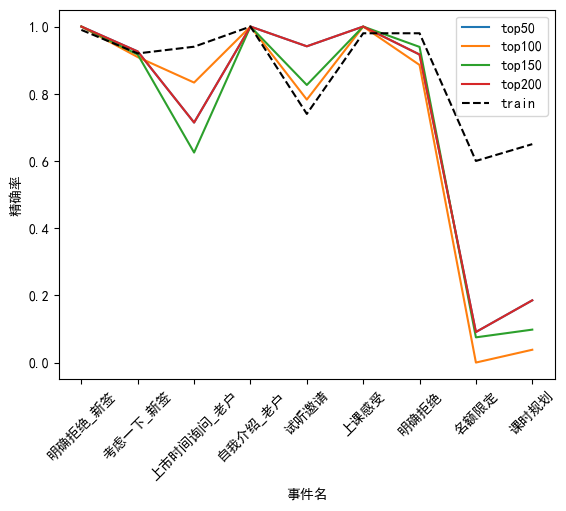

In [79]:
import re
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
xticks_label = ['明确拒绝_新签',
'考虑一下_新签', 
'上市时间询问_老户',
'自我介绍_老户',
'试听邀请',
'上课感受',
'明确拒绝',
'名额限定',
'课时规划'
]
xticks = [0,1,2,3,4,5,6,7,8]
data = pd.read_excel("D:\\microsoft\\faiss相似度模型评测.xlsx",sheet_name='faiss相似度模型评估 (表格视图)')
col = ['top50-测试集result','top100-测试集result','top150-测试集result','top200-测试集result','topk-训练集精确率']
data = data[col]
data.drop(index=3,inplace=True)
lst50 = data[col[0]]
lst50 = [float(i[12:]) for i in lst50]
lst100 = data[col[1]]
lst100 = [float(i[12:]) for i in lst100]
lst150 = data[col[2]]
lst150 = [float(i[12:]) for i in lst150]
lst200 = data[col[3]]

lst200 = [float(i[12:]) for i in lst200]
plt.figure(figsize=(15,10))

df = pd.concat([pd.Series(lst50),pd.Series(lst100),pd.Series(lst150),pd.Series(lst200)],axis=1)
df.plot()
plt.xticks(xticks,xticks_label,rotation=45)
plt.plot(xticks,data[col[4]], color='black', linestyle='--', label='train')
# 添加图例标签
plt.legend(['top50', 'top100', 'top150', 'top200','train'], loc='upper right')
plt.xlabel('事件名')
plt.ylabel('精确率')
plt.show()


In [79]:
import numpy as np
from sklearn.svm import SVC as svc
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.naive_bayes import GaussianNB as nb
from sklearn.ensemble import GradientBoostingClassifier as gbdt
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression as lr
from sklearn.ensemble import RandomForestClassifier as rf  #分类器
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def get_result(model, x, y):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)
    md = model.fit(xtrain,ytrain)
    y_pred_proba = md.predict_proba(xtest)[:, 1] 
    y_pred = model.predict(xtest)

    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    accuracy = accuracy_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)

    fpr, tpr, thresholds = roc_curve(ytest, y_pred_proba)
    auc_score = auc(fpr, tpr)

    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc_score
    }

    return metrics

# 创建模型
models = [
        svc(probability=True),
        knc(),
        nb(),
        gbdt(),
        xgb,
        lda(),
        lgb,
        lr(),
        rf(n_estimators=100,random_state=99)
        ]
for i in models:
    try:
        print(get_result(i,hx,hy))
    except Exception as e:
        print(f'训练模型{i}时出现错误：{e}')



d:\python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Accuracy': 0.8464285714285714, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0, 'AUC': 0.7581199097242665}
训练模型KNeighborsClassifier()时出现错误：'Flags' object has no attribute 'c_contiguous'
{'Accuracy': 0.3678571428571429, 'Precision': 0.12871287128712872, 'Recall': 0.9629629629629629, 'F1 Score': 0.22707423580786026, 'AUC': 0.7444005270092227}
{'Accuracy': 0.9071428571428571, 'Precision': 0.5263157894736842, 'Recall': 0.37037037037037035, 'F1 Score': 0.43478260869565216, 'AUC': 0.7609427609427609}
训练模型<module 'xgboost' from 'd:\\python\\Lib\\site-packages\\xgboost\\__init__.py'>时出现错误：module 'xgboost' has no attribute 'fit'
{'Accuracy': 0.8392857142857143, 'Precision': 0.2916666666666667, 'Recall': 0.2, 'F1 Score': 0.23728813559322035, 'AUC': 0.7341107871720116}
训练模型<module 'lightgbm' from 'C:\\Users\\10634\\AppData\\Roaming\\Python\\Python311\\site-packages\\lightgbm\\__init__.py'>时出现错误：module 'lightgbm' has no attribute 'fit'
{'Accuracy': 0.8785714285714286, 'Precision': 0.55555555555

d:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Accuracy': 0.8714285714285714, 'Precision': 0.75, 'Recall': 0.07894736842105263, 'F1 Score': 0.14285714285714285, 'AUC': 0.7559264897781643}


# 网格搜索

In [90]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import tqdm

# Define a dictionary of hyperparameters to search for each model
param_grid = {
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7],
    },
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
    },
    'LogisticRegression': {
        'C': [0.01, 0.1, 1],
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
    }
    # Add other models and their hyperparameters here
}

# Create a dictionary to map model names to model classes
models = {
    'SVC': SVC(probability=True),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=99)
    # Add other models here
}


for model_name, model in models.items():
    param_grid_model = param_grid.get(model_name, {})
    grid_search = GridSearchCV(model, param_grid_model, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(hx, hy)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best accuracy for {model_name}: {grid_search.best_score_}")


Best parameters for SVC: {'C': 1, 'kernel': 'linear'}
Best accuracy for SVC: 0.8743258007015123
Best parameters for KNeighborsClassifier: {'n_neighbors': 7}
Best accuracy for KNeighborsClassifier: 0.8646598815479271
Best parameters for GradientBoostingClassifier: {'learning_rate': 0.01, 'n_estimators': 100}
Best accuracy for GradientBoostingClassifier: 0.8775458570524984
Best parameters for LogisticRegression: {'C': 1}
Best accuracy for LogisticRegression: 0.8797078948881605


d:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters for RandomForestClassifier: {'n_estimators': 100}
Best accuracy for RandomForestClassifier: 0.878615375769076
